<a href="https://colab.research.google.com/github/malikkotb/Seminar_SS23/blob/main/Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with a Convolutional Neural Network

This step-by-step guide through building a Convolutional Neural Network for Image Classification assumes you have already successfully managed to install PyTorch on your computer and were able to create a new Jupyter Notebook to start coding.

These are imports that we will be needing and using throughout the process of building our entire network.

In [ ]:
# The below imports can be found on https://pytorch.org/docs/
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
import os # https://docs.python.org/3/library/os.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# So we can ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
In this section we will load in the dataset. In this project I have chosen the "Animal Faces" dataset from https://www.kaggle.com/datasets/andrewmvd/animal-faces?resource=download

You can go ahead and **download the dataset from the provided url**.

After downloading the dataset you should upload zipped images folder from your system into Google Colab.
Steps:
1. Download dataset from kaggle. You will receive a zipped file called: "archive.zip".
2. Unzip this file.
2. Upload the unzipped folder: "afhq" to Google Drive.
4. Use the following commands to mount google drive.
5. Then extract files to the local environment with the `!unzip` command

Source: https://www.aboutdatablog.com/post/how-to-successfully-add-large-data-sets-to-google-drive-and-use-them-in-google-colab

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Here we unzip the files:

In [6]:
!unzip gdrive/MyDrive/Seminar\ Data/archive.zip

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: afhq/train/wild/flickr_wild_001378.jpg  
  inflating: afhq/train/wild/flickr_wild_001379.jpg  
  inflating: afhq/train/wild/flickr_wild_001380.jpg  
  inflating: afhq/train/wild/flickr_wild_001381.jpg  
  inflating: afhq/train/wild/flickr_wild_001382.jpg  
  inflating: afhq/train/wild/flickr_wild_001384.jpg  
  inflating: afhq/train/wild/flickr_wild_001385.jpg  
  inflating: afhq/train/wild/flickr_wild_001386.jpg  
  inflating: afhq/train/wild/flickr_wild_001387.jpg  
  inflating: afhq/train/wild/flickr_wild_001388.jpg  
  inflating: afhq/train/wild/flickr_wild_001389.jpg  
  inflating: afhq/train/wild/flickr_wild_001390.jpg  
  inflating: afhq/train/wild/flickr_wild_001391.jpg  
  inflating: afhq/train/wild/flickr_wild_001392.jpg  
  inflating: afhq/train/wild/flickr_wild_001393.jpg  
  inflating: afhq/train/wild/flickr_wild_001394.jpg  
  inflating: afhq/train/wild/flickr_wild_001395.jpg  
  inflating: af

#### Structure of our files
The image files are stored in a main folder called "afhq" and inside that folder there will be two more folders: "train" and "val" for training and validation (aka testing). Each of these folders are subdivided into 3 further folders for the 3 different classes that we have in this dataset: "cat", "dog", and "wild". The "wild" folder contain the images with the wildlife animals.


### View an image from our dataset.

In [7]:
from PIL import Image
from IPython.display import display

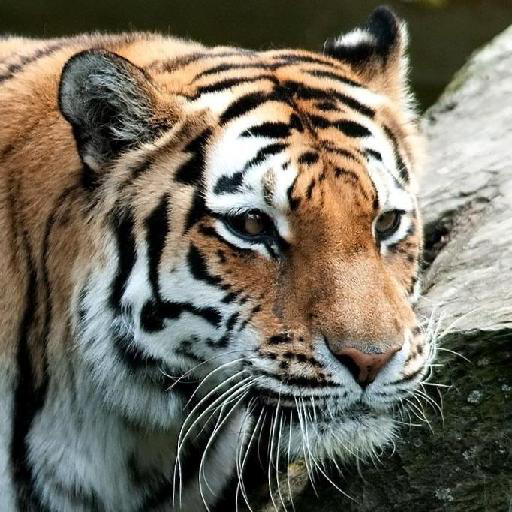

In [10]:
# All images have a prefix of "flickr" or "pixabay", then the corresponding
# class name (cat, dog, wild) and a number, .. .jpg
# Display an image:
with Image.open('/content/afhq/train/wild/flickr_wild_001012.jpg') as im:
  display(im)


## Preparing our Dataset
The following code are mainly from these sources:
*   https://medium.com/thecyphy/train-cnn-model-with-pytorch-21dafb918f48
* https://learn.microsoft.com/en-us/windows/ai/windows-ml/tutorials/pytorch-data
* https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
* https://medium.com/bitgrit-data-science-publication/building-an-image-classification-model-with-pytorch-from-scratch-f10452073212

## Preprocessing and Data Augmentation
In this section we will perform image preprocessing and image transformations to make our images suitable for training.

Data Augmentation: quick explanation (source angeben)

Transformations (rotation, flipping etc.) are used for data augmentation.